In [15]:
from sklearn import preprocessing
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import MinMaxScaler, StandardScaler

In [3]:
Outlook = ['Rainy', 'Rainy', 'Overcast', 'Sunny', 'Sunny', 'Sunny','Overcast','Rainy', 'Rainy', 'Sunny', 'Rainy','Overcast', 'Overcast','Sunny']
Temperature = ['Hot', 'Hot', 'Hot', 'Mild', 'Cool', 'Cool', 'Cool','Mild', 'Cool', 'Mild', 'Mild', 'Mild', 'Hot', 'Mild']
Humidity = ['High', 'High', 'High', 'High', 'Normal', 'Normal', 'Normal','High', 'Normal', 'Normal', 'Normal', 'High', 'Normal','High']
Wind = ['False', 'True', 'False', 'False', 'False', 'True', 'True','False', 'False', 'False', 'True', 'True', 'False', 'True']

Play = ['No', 'No', 'Yes', 'Yes', 'Yes', 'No', 'Yes', 'No','Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'No']

In [4]:
le = preprocessing.LabelEncoder()

Outlook_encoded = le.fit_transform(Outlook)
Outlook_name_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
print("Outllok mapping:",Outlook_name_mapping)

Temperature_encoded = le.fit_transform(Temperature)
Temperature_name_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
print("Temperature mapping:",Temperature_name_mapping)

Humidity_encoded = le.fit_transform(Humidity)
Humidity_name_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
print("Humidity mapping:",Humidity_name_mapping)

Wind_encoded = le.fit_transform(Wind)
Wind_name_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
print("Wind mapping:",Wind_name_mapping)

Play_encoded = le.fit_transform(Play)
Play_name_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
print("Play mapping:",Play_name_mapping)

print("\n\n")
print("Weather:" ,Outlook_encoded)
print("Temerature:" ,Temperature_encoded)
print("Humidity:" ,Humidity_encoded)
print("Wind:" ,Wind_encoded)
print("Play:" ,Play_encoded)

Outllok mapping: {'Overcast': 0, 'Rainy': 1, 'Sunny': 2}
Temperature mapping: {'Cool': 0, 'Hot': 1, 'Mild': 2}
Humidity mapping: {'High': 0, 'Normal': 1}
Wind mapping: {'False': 0, 'True': 1}
Play mapping: {'No': 0, 'Yes': 1}



Weather: [1 1 0 2 2 2 0 1 1 2 1 0 0 2]
Temerature: [1 1 1 2 0 0 0 2 0 2 2 2 1 2]
Humidity: [0 0 0 0 1 1 1 0 1 1 1 0 1 0]
Wind: [0 1 0 0 0 1 1 0 0 0 1 1 0 1]
Play: [0 0 1 1 1 0 1 0 1 1 1 1 1 0]


In [6]:
import numpy as np
import pandas as pd
X_Data = np.array([[1, 1, 0,2, 2, 2, 0, 1, 1, 2, 1, 0, 0, 2],[1, 1 ,1, 2, 0, 0, 0, 2, 0, 2, 2, 2, 1, 2],[0 ,0 ,0 ,0 ,1 ,1 ,1 ,0 ,1 ,1 ,1 ,0, 1, 0],[0 ,1 ,0, 0, 0, 1, 1 ,0 ,0 ,0 ,1 ,1, 0, 1]])

In [ ]:
X_Data = X_Data.T
print(X_Data)

In [ ]:
cl_g = DecisionTreeClassifier(criterion="entropy")
cl_g.fit(X_Data, Play)

In [9]:
def prediction(X):
  return cl_g.predict(X)

In [ ]:
X=[[2 ,2 ,1 ,0]]
if prediction(X) == 1:
  print("Predicted Yes")
else:
  print("Predicted No")

In [12]:
from sklearn import datasets
iris = datasets.load_iris()

In [ ]:
print(iris)

In [ ]:
X_Data = iris.data
Y = iris.target
scaler = MinMaxScaler()
X_Scaled = scaler.fit_transform(X_Data)
print(X_Scaled)

In [ ]:
print(Y)

In [21]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_Scaled, Y, test_size = 0.2, random_state = 100)

In [ ]:
model = DecisionTreeClassifier(criterion = "gini")
model.fit(X_train, y_train)

In [ ]:
pred = model.predict(X_test)
print(pred)

In [ ]:
i = 0
correct = 0
for j in pred:
  if j == y_test[i]:
    correct = correct + 1
  i = i + 1
print("Accuracy : ", (correct*100)/i)

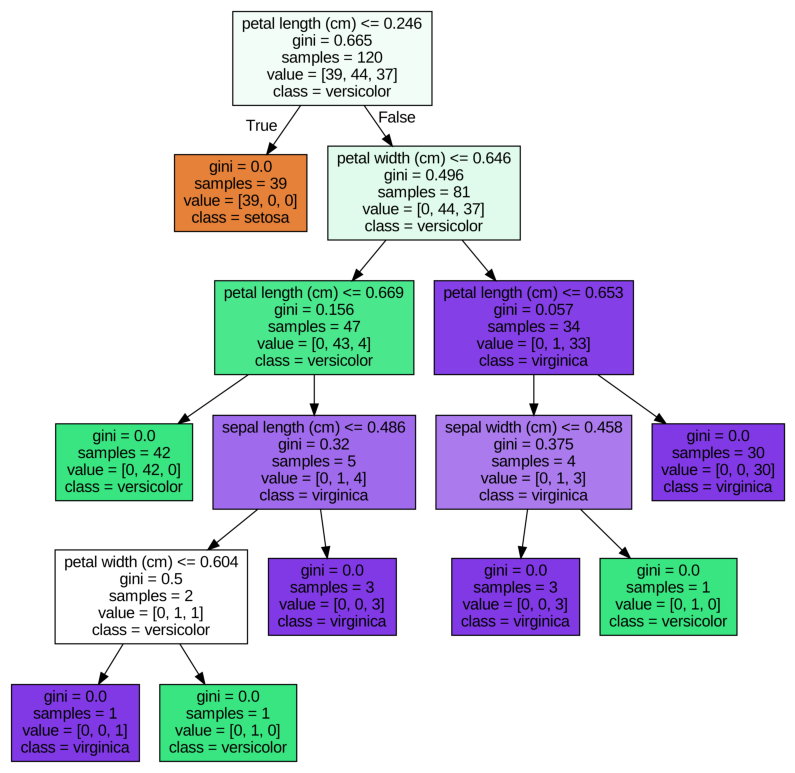

In [25]:
from sklearn.tree import export_graphviz
export_graphviz(model,out_file='tree_entropy.dot',feature_names=['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)'],class_names=['setosa', 'versicolor', 'virginica'],filled=True)
# Convert to png
from subprocess import call
call(['dot', '-Tpng', 'tree_entropy.dot', '-o', 'tree_entropy.png','-Gdpi=600'])
# Display in python
import matplotlib.pyplot as plt
plt.figure(figsize = (14, 18))
plt.imshow(plt.imread('tree_entropy.png'))
plt.axis('off');
plt.show();

In [ ]:
model = DecisionTreeClassifier(random_state=0)
path = model.cost_complexity_pruning_path(X_train, y_train)
ccp_al = path.ccp_alphas
print(ccp_al)

In [ ]:
clfs = []
for ccp_alpha in ccp_al:
  clf = DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha)
  clf.fit(X_train, y_train)
  clfs.append(clf)
print("Number of nodes in the last tree is: {} with ccp_alpha: {}".format(clfs[-1].tree_.node_count, ccp_al[-1]))

In [28]:
def print_graph(model):
  from sklearn.tree import export_graphviz
  export_graphviz(model,out_file='tree_entropy.dot',feature_names=['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)'],class_names=['setosa', 'versicolor', 'virginica'],filled=True)
  # Convert to png
  from subprocess import call
  call(['dot', '-Tpng', 'tree_entropy.dot', '-o', 'tree_entropy.png','-Gdpi=600'])
  # Display in python
  import matplotlib.pyplot as plt
  plt.figure(figsize = (14, 18))
  plt.imshow(plt.imread('tree_entropy.png'))
  plt.axis('off');
  plt.show();

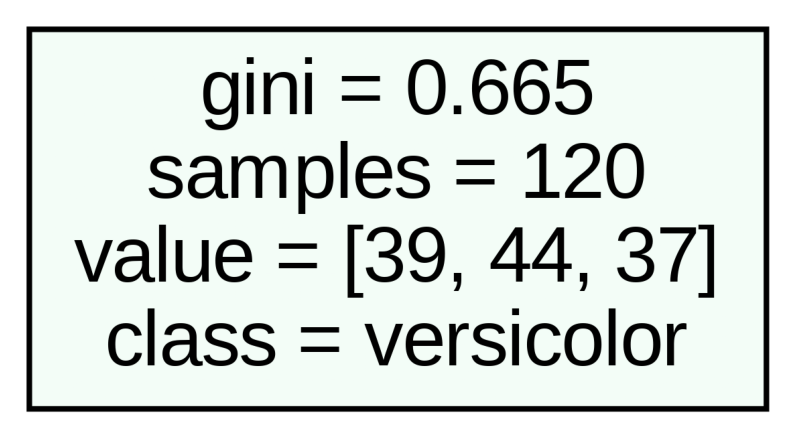

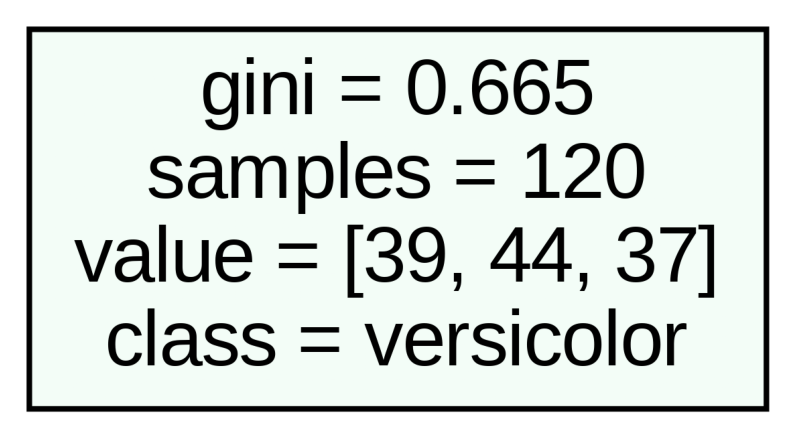

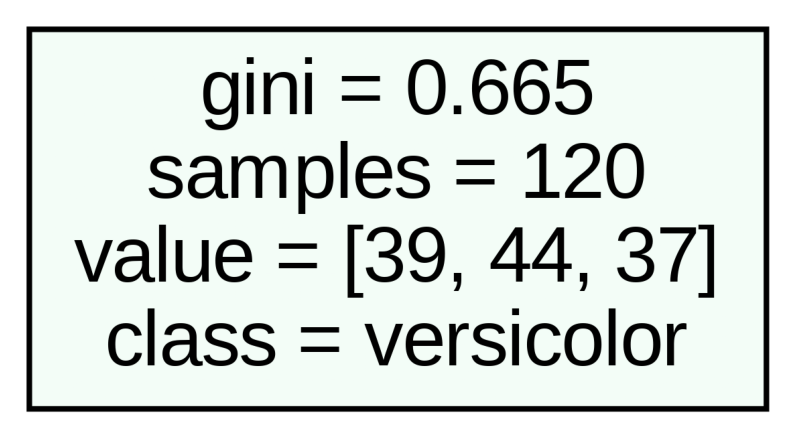

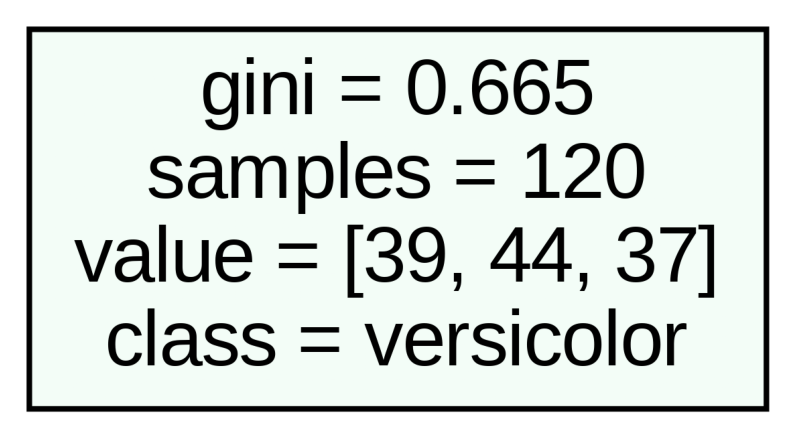

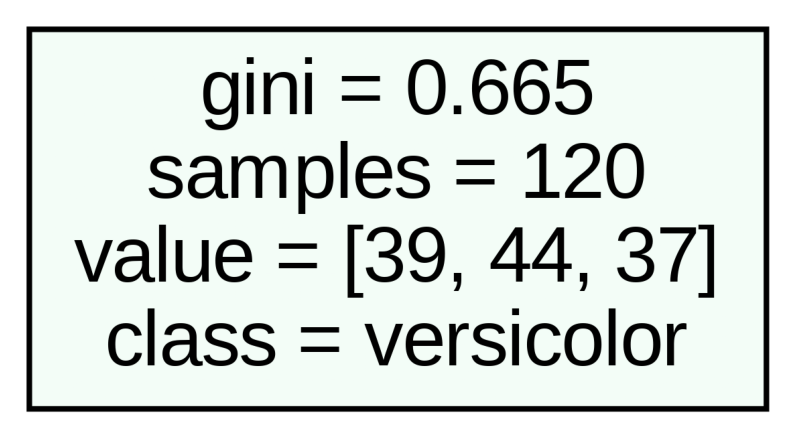

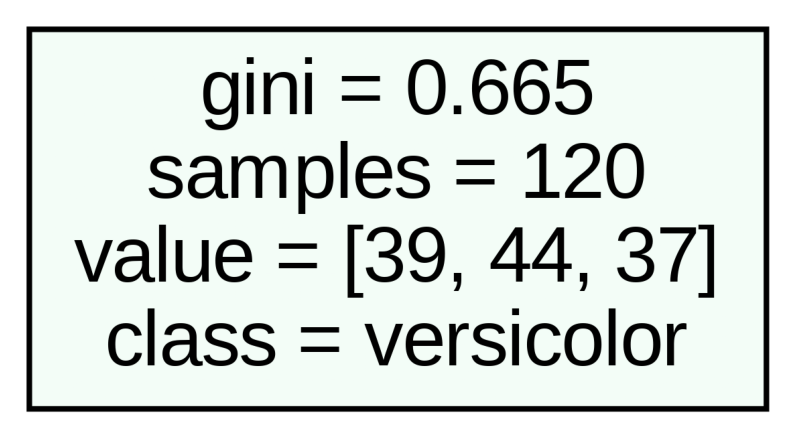

Number of nodes in the last tree is: 1 with ccp_alpha: 0.32988168724279837


In [29]:
clfs = []
clf = DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha)
for ccp_alpha in ccp_al:
  clf.fit(X_train, y_train)
  clfs.append(clf)
  print_graph(clf)
print("Number of nodes in the last tree is: {} with ccp_alpha: {}".format(clfs[-1].tree_.node_count, ccp_al[-1]))

#Exercise

#Task 1: Try the algo on Same Weather dataset - OneHotEncoding of features: and Train test Division 75%-25%

In [ ]:
import numpy as np
import pandas as pd
from pandas import read_csv
data2 = pd.read_csv('/content/drive/MyDrive/Dataset2.csv')
# data2 = np.array(data2)
print(data2)

In [ ]:
from sklearn.preprocessing import LabelEncoder,OneHotEncoder

onehotencoder = OneHotEncoder()

X = data2.iloc[:,:-1]
y = data2.iloc[:,-1:]
print(X)
print(y)

ol = onehotencoder.fit_transform(X.Outlook.values.reshape(-1,1)).toarray()
tm = onehotencoder.fit_transform(X.Temp.values.reshape(-1,1)).toarray()
wd = onehotencoder.fit_transform(X.Wind.values.reshape(-1,1)).toarray()
hm = onehotencoder.fit_transform(X.Humidity.values.reshape(-1,1)).toarray()

dfOneHot = pd.DataFrame(ol, columns = ["Outlook"+str(int(i)) for i in range(0,3)])
X = pd.concat([X, dfOneHot], axis=1) 
X = X.drop(["Outlook"], axis=1)
dfOneHot = pd.DataFrame(ol, columns = ["Temp"+str(int(i)) for i in range(0,3)])
X = pd.concat([X, dfOneHot], axis=1) 
X = X.drop(['Temp'], axis=1)
dfOneHot = pd.DataFrame(ol, columns = ["Wind"+str(int(i)) for i in range(0,3)])
X = pd.concat([X, dfOneHot], axis=1) 
X = X.drop(['Wind'], axis=1)
dfOneHot = pd.DataFrame(ol, columns = ["Humidity"+str(int(i)) for i in range(0,3)])
X = pd.concat([X, dfOneHot], axis=1) 
X = X.drop(['Humidity'], axis=1)
print(X.head())

In [ ]:
le = preprocessing.LabelEncoder()
y = le.fit_transform(y)
print(y)

In [ ]:
print(X)

In [35]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 100)

In [ ]:
model = DecisionTreeClassifier(criterion = "gini")
model.fit(X_train, y_train)

In [ ]:
pred = model.predict(X_test)
print(pred)

In [ ]:
i = 0
correct = 0
for j in pred:
  if j == y_test[i]:
    correct = correct + 1
  i = i + 1
print("Accuracy : ", (correct*100)/i)